In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder


#cargar el archivo CSV
df =pd.read_csv("student_depression_dataset.csv")

In [72]:
df.head()

#Para el jueves: analisis de cada columna

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


<Axes: >

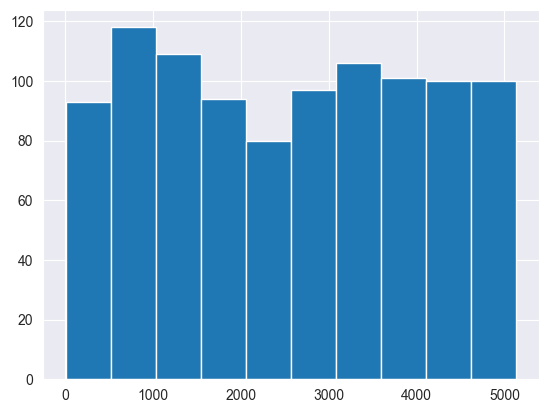

In [73]:
df["id"].hist()

In [74]:
def null_percentage(df):
    """
    Returns a DataFrame with the percentage of null (NaN) values per column.
    """
    percentage = df.isnull().mean() * 100
    return percentage.to_frame(name='Null Percentage')


def zero_percentage(df):
    """
    Returns a DataFrame with the percentage of zero values per column.
    """
    percentage = (df == 0).mean() * 100
    return percentage.to_frame(name='Zero Percentage')

## Lectura de Dataset

In [75]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [76]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Verificación de cantidad de nulos y de zeros

In [77]:
null_percentage(df)

,Null Percentage
id,0.0
Gender,0.0
Age,0.0
City,0.0
Profession,0.0
Academic Pressure,0.0
Work Pressure,0.0
CGPA,0.0
Study Satisfaction,0.0
Job Satisfaction,0.0


In [78]:
zero_percentage(df)

,Zero Percentage
id,0.000000
Gender,0.000000
Age,0.000000
City,0.000000
Profession,0.000000
Academic Pressure,0.000000
Work Pressure,100.000000
CGPA,0.000000
Study Satisfaction,0.000000
Job Satisfaction,99.899800


## Analisis de varianza

In [79]:
df['id'].value_counts()
# Alta varianza, por tanto se elimina

id
5136    1
2       1
8       1
26      1
30      1
       ..
62      1
83      1
91      1
94      1
100     1
Name: count, Length: 998, dtype: int64

<Axes: xlabel='Degree'>

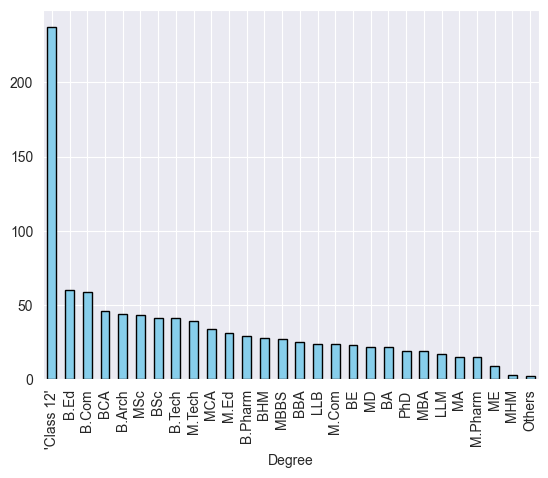

In [80]:
df[('Degree')].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

In [81]:
df = df[~df['Degree'].isin(['Others', 'MHM'])]

# Verificar los cambios
print(df['Degree'].value_counts())

Degree
'Class 12'    237
B.Ed           60
B.Com          59
BCA            46
B.Arch         44
MSc            43
B.Tech         41
BSc            41
M.Tech         39
MCA            34
M.Ed           31
B.Pharm        29
BHM            28
MBBS           27
BBA            25
M.Com          24
LLB            24
BE             23
MD             22
BA             22
PhD            19
MBA            19
LLM            17
M.Pharm        15
MA             15
ME              9
Name: count, dtype: int64


In [82]:
# ELIMINACION DE VARIABLES:
columns_to_drop = ['id', 'Job Satisfaction', 'Work Pressure','Profession']
df_clean = df.drop(columns=columns_to_drop)

In [83]:
df_clean.shape

(993, 14)

In [84]:
df_clean.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [85]:
df_clean.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## preparación de datos

In [86]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Lista de columnas categóricas
categorical_columns = ['Gender', 'Dietary Habits', 'Degree',
                       'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness','City','Sleep Duration']

# Inicializamos el codificador
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'sparse' es ahora 'sparse_output'

# Aplicamos el encoder a las columnas categóricas
encoded_array = encoder.fit_transform(df_clean[categorical_columns])

# Creamos un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_array,
                          columns=encoder.get_feature_names_out(categorical_columns),
                          index=df_clean.index)

# Combinamos con el DataFrame original (sin las columnas categóricas)
df_encoded = pd.concat([df_clean.drop(columns=categorical_columns), encoded_df], axis=1)

# Mostramos el resultado
df_encoded.head()


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_B.Arch,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MSc,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Kolkata,City_Lucknow,City_Ludhiana,City_Meerut,City_Mumbai,City_Nagpur,City_Nashik,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours'
0,33.0,5.0,8.97,2.0,3.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,24.0,2.0,5.90,5.0,3.0,2.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.0,3.0,7.03,5.0,9.0,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28.0,3.0,5.59,2.0,4.0,5.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25.0,4.0,8.13,3.0,1.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Análisis general

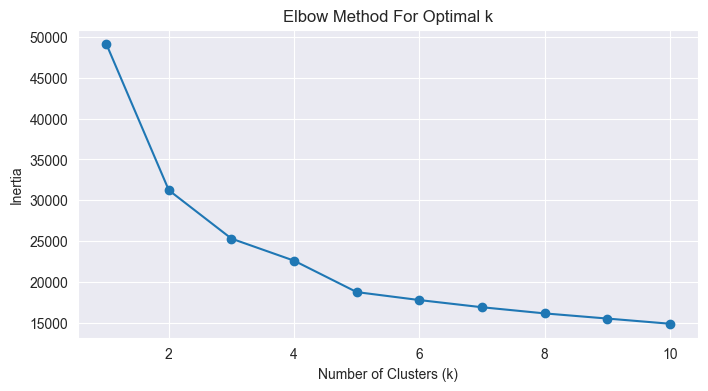

In [87]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)


# Graficar el resultado
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [88]:
# Asignar número de clusters
k = 3

# Entrenar modelo
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_encoded)

# Agregar columna de cluster al DataFrame original(df_clean), se hace asi para tener los datos sin normalizar
df_clustering = df_clean.copy()
df_clustering['cluster'] = kmeans.labels_

In [89]:
df_clustering['cluster'].value_counts()

cluster
1    420
2    341
0    232
Name: count, dtype: int64

In [90]:
df_clustering.groupby('cluster').describe()

Age                                                     \
         count       mean       std   min   25%   50%   75%   max   
cluster                                                             
0        232.0  26.521552  3.879066  19.0  24.0  26.5  29.0  34.0   
1        420.0  21.283333  2.296248  18.0  19.0  21.0  23.0  26.0   
2        341.0  30.366569  2.549036  26.0  28.0  30.0  33.0  39.0   

        Academic Pressure                                                CGPA  \
                    count      mean       std  min  25%  50%  75%  max  count   
cluster                                                                         
0                   232.0  2.918103  1.397964  1.0  2.0  3.0  4.0  5.0  232.0   
1                   420.0  3.271429  1.441837  1.0  2.0  3.0  5.0  5.0  420.0   
2                   341.0  3.225806  1.392852  1.0  2.0  3.0  4.0  5.0  341.0   

                                                                \
             mean       std   min     25%   50%     75%    max   
cluster                                                          
0        7.878405  1.419459  5.06  6.7725  8.04  9.2100   9.97   
1        7.421405  1.432472  5.08  6.0950  7.29  8.6425  10.00   
2        7.775660  1.506455  5.08  6.4700  7.94  9.0200   9.98   

        Study Satisfaction                                               \
                     count      mean       std  min  25%  50%  75%  max   
cluster                                                                   
0                    232.0  3.004310  1.327361  1.0  2.0  3.0  4.0  5.0   
1                    420.0  2.828571  1.342936  1.0  2.0  3.0  4.0  5.0   
2                    341.0  2.914956  1.359643  1.0  2.0  3.0  4.0  5.0   

        Work/Study Hours                                                 \
                   count      mean       std  min  25%  50%   75%   max   
cluster                                                                   
0                  232.0  2.021552  1.838610  0.0  0.0  2.0   3.0   7.0   
1                  420.0  8.488095  2.638498  1.0  7.0  9.0  11.0  12.0   
2                  341.0  8.950147  2.520593  3.0  7.0  9.0  11.0  12.0   

        Financial Stress                                               \
                   count      mean       std  min  25%  50%  75%  max   
cluster                                                                 
0                  232.0  2.948276  1.470311  1.0  2.0  3.0  4.0  5.0   
1                  420.0  3.335714  1.420666  1.0  2.0  4.0  5.0  5.0   
2                  341.0  2.862170  1.447637  1.0  2.0  3.0  4.0  5.0   

        Depression                                               
             count      mean       std  min  25%  50%  75%  max  
cluster                                                          
0            232.0  0.405172  0.491987  0.0  0.0  0.0  1.0  1.0  
1            420.0  0.714286  0.452293  0.0  0.0  1.0  1.0  1.0  
2            341.0  0.557185  0.497449  0.0  0.0  1.0  1.0  1.0

## Division del conjunto para hacer entrenamiento

In [91]:
y = df_encoded['Depression']
X = df_encoded.drop(columns=['Depression'])


# Paso 1: 80% Train + 20% Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: del 80% original, saca 80% Train y 20% Validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# ✅ Resultado:
# X_train: 64% del total
# X_val: 16% del total
# X_test: 20% del total

# Verifica tamaños si quieres:
print(f"Train: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Test: {len(X_test)}")

Train: 635
Validation: 159
Test: 199


In [92]:
# 2. Unimos cada X con su y respectiva
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# 3. Guardamos los archivos CSV
train.to_csv('./Data/train.csv', index=False)
val.to_csv('./Data/validation.csv', index=False)
test.to_csv('./Data/test.csv', index=False)

## Análisis de variables usando un arbol de desicion

In [93]:

# 1. Crear el modelo (para regresión, usa DecisionTreeRegressor)
model = DecisionTreeRegressor(max_depth=4, random_state=42)

# 2. Entrenar el modelo
model.fit(X_train, y_train)

# 3. Evaluar en validación (opcional)
score = model.score(X_val, y_val)
print(f"Validation R^2 Score: {score:.2f}")

Validation R^2 Score: 0.39


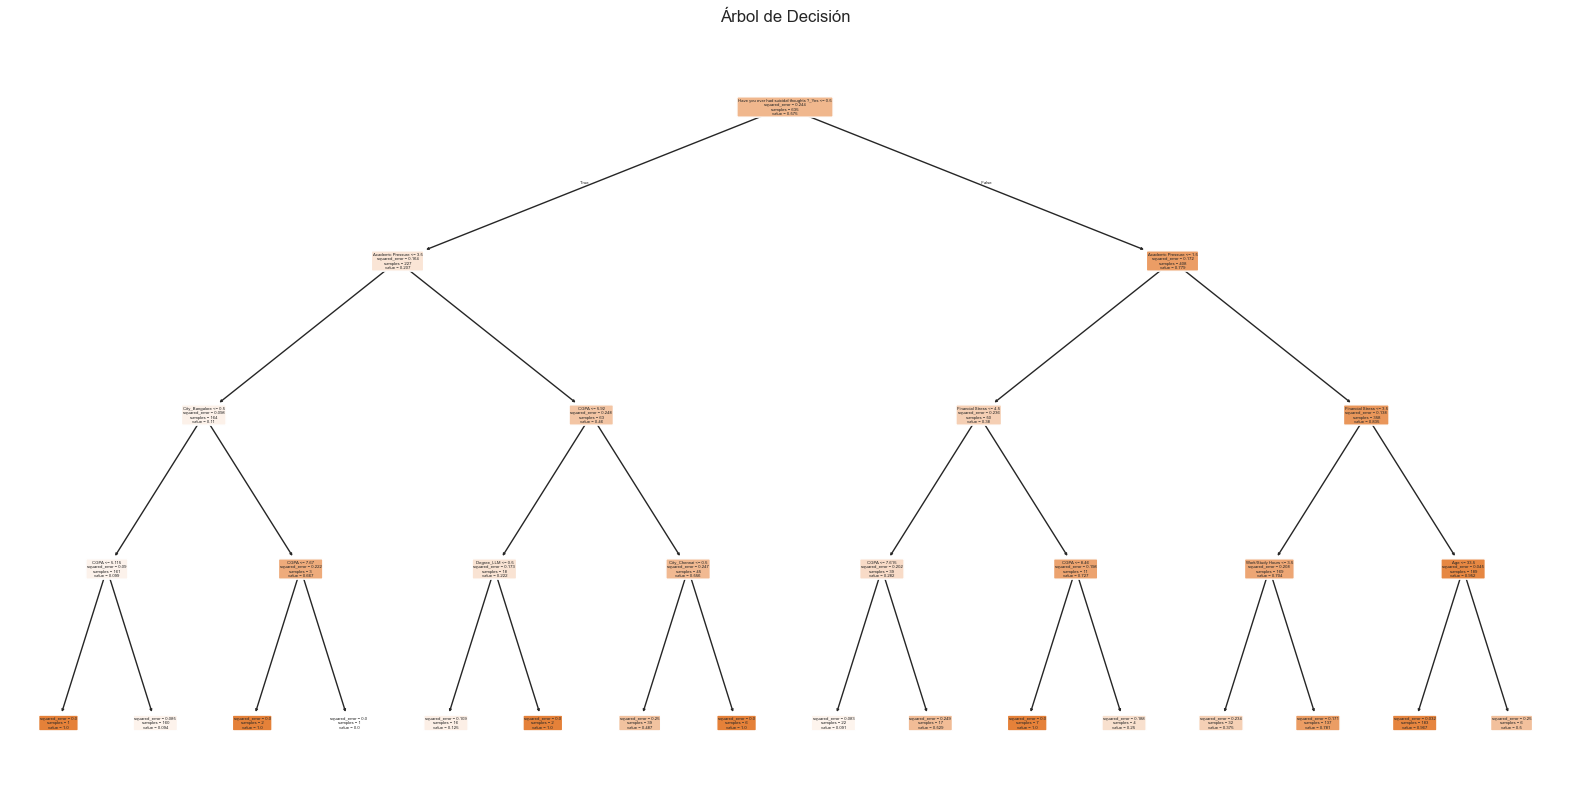

In [96]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.savefig("./Data/arbol.jpg", format='jpg', dpi=300, bbox_inches='tight')

In [97]:
plt.close()  # Cierra la figura para liberar memoria